<a href="https://colab.research.google.com/github/alessiapapalini/MLPNS2021/blob/main/HM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COMANDI PER IMPORTARE**


In [1]:
import numpy as np

In [2]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
from scipy.optimize import curve_fit, minimize
    
%pylab inline
# this package sets up pretty plots
import seaborn
seaborn.set_style("darkgrid")

Populating the interactive namespace from numpy and matplotlib


# **DISTRIBUZIONE CHI QUADRATO**

In [53]:
distributions = ['chis']

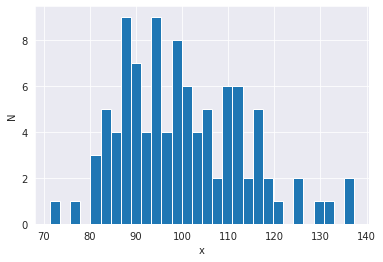

In [54]:
import numpy as np #chisquare

mymean=100
df=mymean
np.random.seed(456) #per riprodurre sempre lo stesso valore
md = {}
md['chis'] = np.random.chisquare(df, size=100)
pl.hist(md['chis'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');


In [ ]:
 a=np.random.chisquare(df, size=100)
 mean(a)

In [55]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chis'].mean(), md['chis'].std()))

Chisq mean: 100.09, standard deviation: 13.24


In [56]:
mysize1 = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize1.shape)

shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

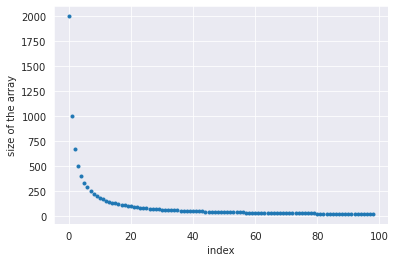

In [57]:
pl.plot(mysize1, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

Text(1259.3999999999999, 100, 'expected mean')

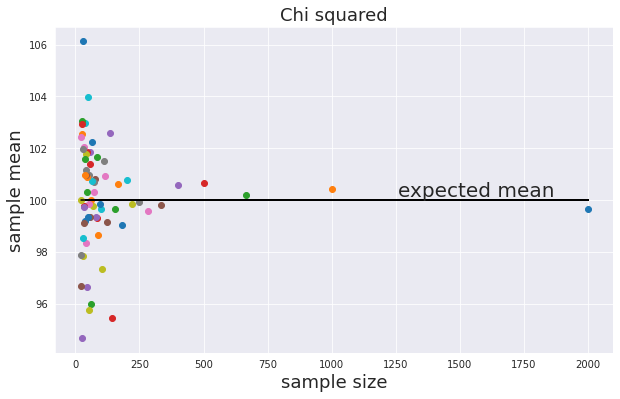

In [58]:
 md['chisq'] = {} #chisquare 
 
#and do it in a for loop. not pythonic, but easily readable

for n in mysize1:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for m in md['chisq']:
    if not type(m) == str:
        md['chisq']['means'][m] = md['chisq'][m].mean()
        #and plot it
        axchisq_mu_n.plot(m, md['chisq']['means'][m], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize1), max(mysize1)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Text(0, 0.5, 'N')

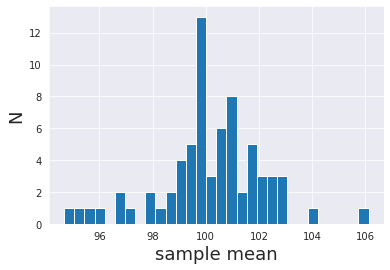

In [59]:
allmeans = list(md['chisq']['means'].values())

#pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

# **DISTRIBUZIONE GAUSSIANA**

In [4]:
distributions = ['gauss'] #gaussiana 

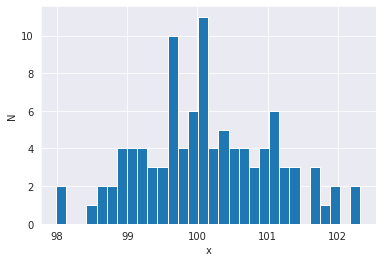

In [61]:
import numpy as np #gaussiana
mymean=100
df1=mymean
np.random.seed(456) #per riprodurre sempre lo stesso valore
md1 = {}
md1['gauss'] = np.random.normal(df1, size=100)
pl.hist(md1['gauss'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');


In [63]:
print ("gaussian mean: %.2f, standard deviation: %.2f"%(md1['gauss'].mean(), md1['gauss'].std()))

gaussian mean: 100.14, standard deviation: 0.92


Text(1259.3999999999999, 100, 'expected mean')

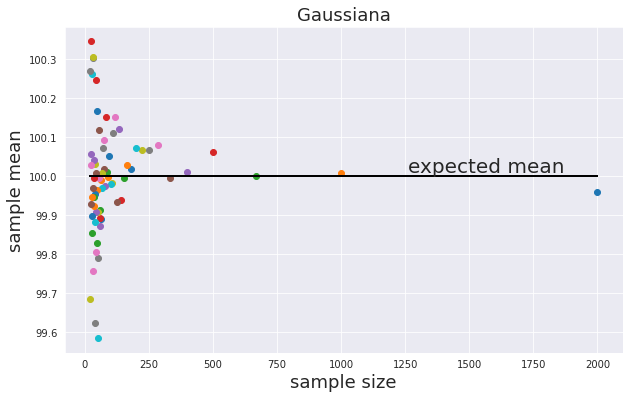

In [65]:
md1['gauss'] = {}  #gaussiana

#and do it in a for loop. not pythonic, but easily readable

for n in mysize1:
    md1['gauss'][n] = np.random.normal(df1, size = n)
    
# save the means for plotting later    

md1['gauss']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for m in md1['gauss']:
    if not type(m) == str:
        md1['gauss']['means'][m] = md1['gauss'][m].mean()
        #and plot it
        axchisq_mu_n.plot(m, md1['gauss']['means'][m], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Gaussiana', fontsize=18)
        axchisq_mu_n.plot([min(mysize1), max(mysize1)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Text(0, 0.5, 'N')

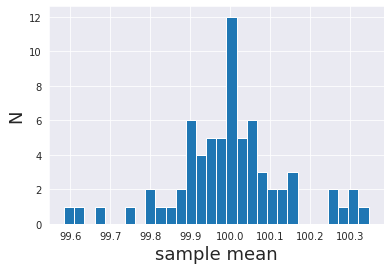

In [66]:
allmeans = list(md1['gauss']['means'].values()) #gaussiana 
#pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

# **DISTRIBUZIONE POISSONIANA**

In [5]:
distributions = ['pois']

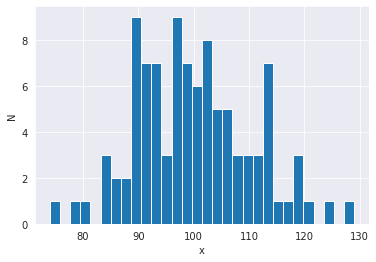

In [67]:
import numpy as np #poissoniana
mymean=100
df2=mymean
np.random.seed(456) #per riprodurre sempre lo stesso valore
md2={}
md2['pois'] = np.random.poisson(df2, size=100)
pl.hist(md2['pois'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

In [69]:
print ("possion mean: %.2f, standard deviation: %.2f"%(md2['pois'].mean(), md2['pois'].std()))

possion mean: 99.90, standard deviation: 10.46


Text(1259.3999999999999, 100, 'expected mean')

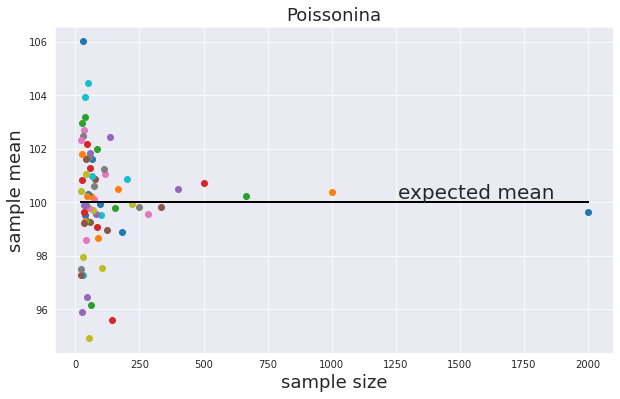

In [72]:
md2['pois'] = {}  #poisson

#and do it in a for loop. not pythonic, but easily readable

for n in mysize1:
    md2['pois'][n] = np.random.chisquare(df2, size = n)
    
# save the means for plotting later    

md2['pois']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for m in md2['pois']:
    if not type(m) == str:
        md2['pois']['means'][m] = md2['pois'][m].mean()
        #and plot it
        axchisq_mu_n.plot(m, md2['pois']['means'][m], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Poissonina', fontsize=18)
        axchisq_mu_n.plot([min(mysize1), max(mysize1)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Text(0, 0.5, 'N')

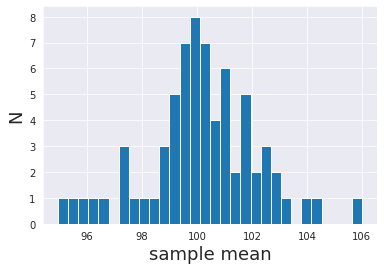

In [73]:
allmeans = list(md2['pois']['means'].values()) 
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

# **DISTRIBUZIONE BINOMIALE**

In [76]:
distributions = ['binomial']

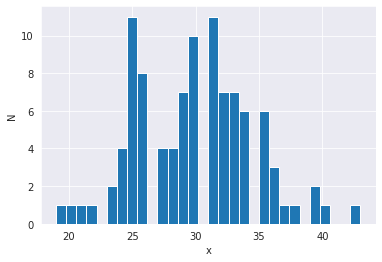

In [74]:
import numpy as np #binomiale
np.random.seed(456) #per riprodurre sempre lo stesso valore
mymean=100
df3=mymean
md3= {}
md3['binomial'] = np.random.binomial(df3, p=0.3, size=100)
pl.hist(md3['binomial'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');


In [75]:
print ("binomial mean: %.2f, standard deviation: %.2f"%(md3['binomial'].mean(), md3['binomial'].std()))

binomial mean: 29.84, standard deviation: 4.55


Text(1259.3999999999999, 100, 'expected mean')

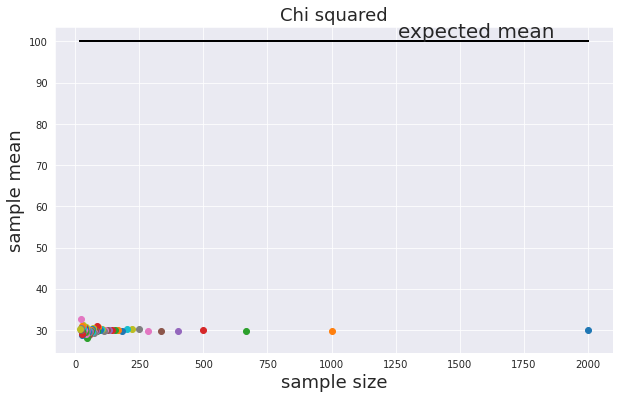

In [77]:
md3['binomial'] = {}  #gaussiana

#and do it in a for loop. not pythonic, but easily readable

for n in mysize1:
    md3['binomial'][n] = np.random.binomial(df, p=0.3, size = n)
  
# save the means for plotting later    

md3['binomial']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for m in md3['binomial']:
    if not type(m) == str:
        md3['binomial']['means'][m] = md3['binomial'][m].mean()
        #and plot it
        axchisq_mu_n.plot(m, md3['binomial']['means'][m], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Binomiale', fontsize=18)
        axchisq_mu_n.plot([min(mysize1), max(mysize1)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Text(0, 0.5, 'N')

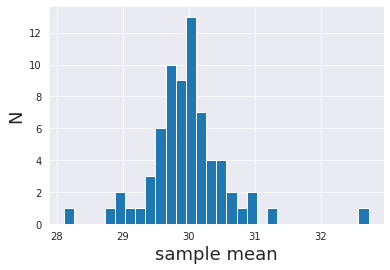

In [78]:
allmeans = list(md3['binomial']['means'].values())
#pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

# **DISTRIBUZIONE DI CAUCHY**

In [7]:
distributions = ['cauchy']

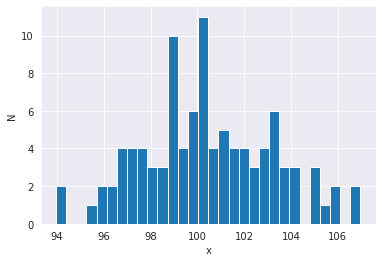

In [80]:
mymeans=100 #cauchy 
df4=mymean
import numpy as np 
import scipy.stats as stats
np.random.seed(456) #per riprodurre sempre lo stesso valore
md4= {}
md4['cauchy'] = stats.norm.rvs(loc=100, scale=3, size=100)
pl.hist(md4['cauchy'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

In [82]:
print ("cauchy mean: %.2f, standard deviation: %.2f"%(md4['cauchy'].mean(), md4['cauchy'].std()))

cauchy mean: 100.43, standard deviation: 2.76


Text(1259.3999999999999, 100, 'expected mean')

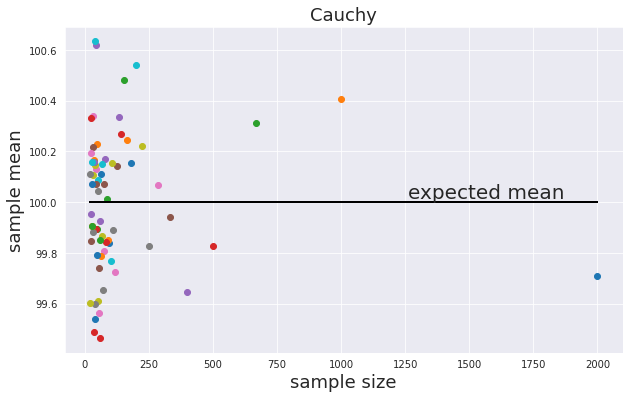

In [91]:
md4['cauchy'] = {} #cauchy 
 
#and do it in a for loop. not pythonic, but easily readable

for n in mysize1:
    md4['cauchy'][n] = stats.norm.rvs(loc=100, scale=3, size=100)

# save the means for plotting later    

md4['cauchy']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for m in md4['cauchy']:
    if not type(m) == str:
        md4['cauchy']['means'][m] = md4['cauchy'][m].mean()
        #and plot it
        axchisq_mu_n.plot(m, md4['cauchy']['means'][m], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Cauchy', fontsize=18)
        axchisq_mu_n.plot([min(mysize1), max(mysize1)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Text(0, 0.5, 'N')

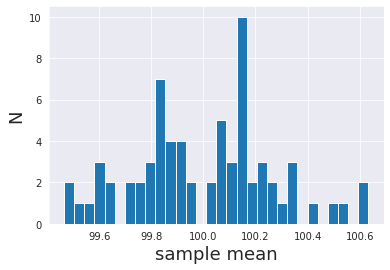

In [92]:
allmeans = list(md4['cauchy']['means'].values())
#pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

# **DISTRIBUZIONE A CONFRONTO**

In [35]:
import numpy as np
import pylab as plt


Text(0, 0.5, 'N')

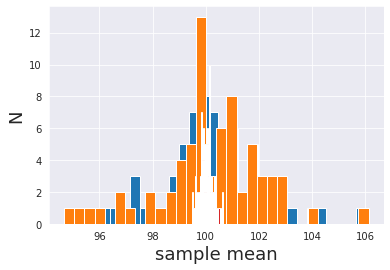

In [95]:
allmeans = list(md2['pois']['means'].values()) 
#pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

allmeans = list(md['chisq']['means'].values())
#pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

allmeans = list(md1['gauss']['means'].values())
#pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

allmeans = list(md4['cauchy']['means'].values())
#pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

In [36]:
   x= np.array(range(-20,20))

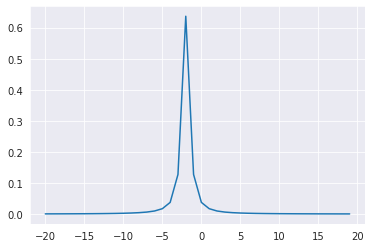

In [37]:
def cauchy(x, mu, gamma):
    return 1./(np.pi*gamma*(1.+((x-mu)/gamma)**2))

mu=-2
gamma=0.5 

cauchy(x,mu,gamma)
plt.plot (x, cauchy(x,mu, gamma))

In [41]:
def mygauss(x,mu, sig):
  return  1/np.sqrt(2*np.pi)/sig * (np.exp(-(x-mu)**2/2/sig**2))
x=np.arange(200)
mu=100
sig=10
#mygauss(x,mu,sig) #array of floating number

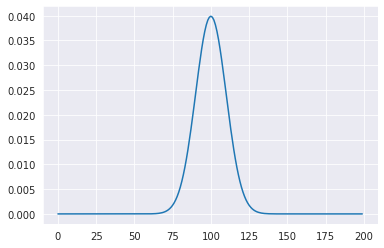

In [42]:
plt.plot (x, mygauss(x,mu, sig))

